In [1]:
from pylab import *
from classy import *

Version:  0.0.68


# Images

In [2]:
images=image.load_images('images/digits')

[eight]: 174 files found
[nine]: 180 files found
[three]: 183 files found
[one]: 182 files found
[zero]: 178 files found
[seven]: 179 files found
[two]: 177 files found
[six]: 181 files found
[five]: 182 files found
[four]: 181 files found


In [3]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: 'eight', 'nine', 'three', 'one', 'zero', 'seven', 'two', 'six', 'five', 'four'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.

In [4]:
data_train,data_test=split(data)

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


In [5]:
C=BackProp([
    Input(shape=(64,)),  # number of inputs
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=10),  # output = number of categories
    ],learning_rate=0.001
)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs        ┃ outputs       ┃ params            ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,64] │ float32[1,10] │                   │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_0 │ Dense         │ float32[1,64] │ float32[1,15] │ bias: float32[15] │
│          │               │               │               │ kernel:           │
│          │               │               │               │ float32[64,15]    │
│          │               │               │               │                   │
│          │               │               │               │ 975 (3.9 KB)      │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_2 │ Dense         

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 648.12it/s]


On train:  1.0
On test:  0.9377778172492981


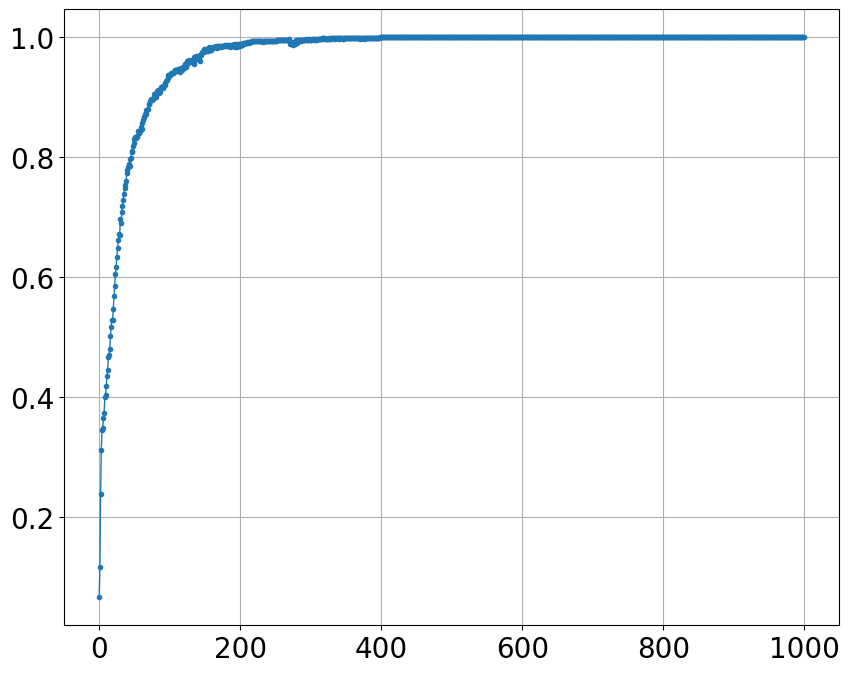

In [6]:
C.fit(data_train.vectors,data_train.targets,epochs=1000)
plot(C.training_accuracies,'.-',lw=1)

print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))

In [7]:
images=image.load_images('images/hawkins_bitmaps subset/clean')

Expecting a folder of target-named folders.  Found  images/hawkins_bitmaps subset/clean/Icon
[cat]: 20 files found
[bed]: 6 files found
[dog]: 20 files found
[helicopter]: 12 files found
[bus]: 5 files found
[mug]: 18 files found
[wineglass]: 5 files found


In [8]:
data=image.images_to_vectors(images)

86 vectors of length 1024
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p1019', 'p1020', 'p1021', 'p1022', 'p1023'  (1024 features)
Target values given.
Target names: 'cat', 'bed', 'dog', 'helicopter', 'bus', 'mug', 'wineglass'
Mean:  [252.03488372 252.03488372 252.03488372 ... 255.         255.
 255.        ]
Median:  [255. 255. 255. ... 255. 255. 255.]
Stddev:  [27.33702136 27.33702136 27.33702136 ...  0.          0.
  0.        ]


In [9]:
data_train,data_test=split(data)

Original vector shape:  (86, 1024)
Train vector shape:  (64, 1024)
Test vector shape:  (22, 1024)


In [11]:
C=BackProp([
    Input(shape=(1024,)),  # number of inputs
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=7),  # output = number of categories
    ],learning_rate=0.001
)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs          ┃ outputs       ┃ params          ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,1024] │ float32[1,7]  │                 │
├──────────┼───────────────┼─────────────────┼───────────────┼─────────────────┤
│ layers_0 │ Dense         │ float32[1,1024] │ float32[1,15] │ bias:           │
│          │               │                 │               │ float32[15]     │
│          │               │                 │               │ kernel:         │
│          │               │                 │               │ float32[1024,1… │
│          │               │                 │               │                 │
│          │               │                 │               │ 15,375 (61.5    │
│          │               

In [10]:
len(data_train.target_names)

7

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1602.22it/s]


On train:  0.28125
On test:  0.09090909361839294


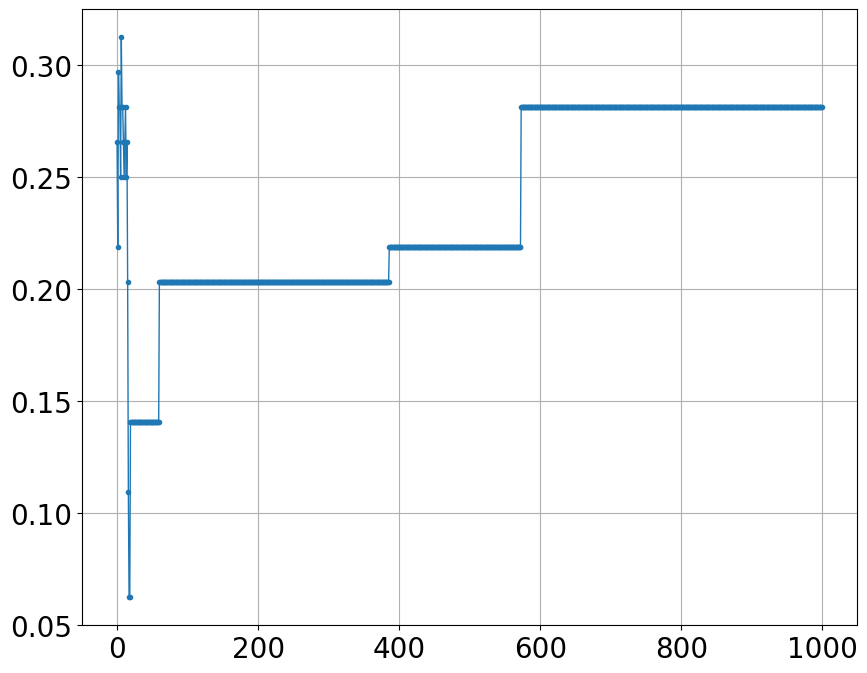

In [12]:
C.fit(data_train.vectors,data_train.targets,epochs=1000)
plot(C.training_accuracies,'.-',lw=1)

print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))